In [3]:
#02.Neural netowrk classification with PyTorch 
# Classification is a problem whether something is one thing or another

In [4]:
## 1. Make classification data and get it ready
import sklearn
from sklearn.datasets import make_circles 
import torch 
n_samples = 1000

X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
print(f"First 5 samples of X: {X[:5]}" )
print(f"First 5 samples of y: {y[:5]}" )

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [7]:
# Make DataFrame of circle data

import pandas as pd 

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
 #Visualize \
    
import matplotlib.pyplot as plt

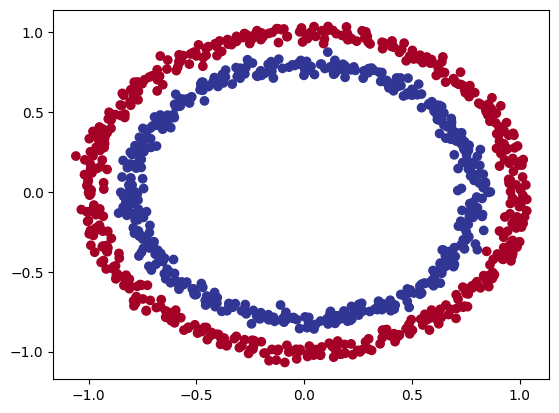

In [9]:
plt.scatter(x=X[:,0],
            y= X[:, 1],
            c=y,
            cmap = plt.cm.RdYlBu)

In [10]:
#1.1 Check input and output shapes 

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [13]:
# 1.2 Turn data intp tensors and create train test splits 

In [14]:
import torch
torch.__version__

'2.0.0+cu118'

In [15]:
X = torch.from_numpy(X).type(torch.float)

In [16]:
y = torch.from_numpy(y).type(torch.float)

In [17]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [18]:
# split data into train and test sets 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [21]:
y_train

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [22]:
len(X_train), len(X_test)

(800, 200)

In [23]:
#2. Building a model 

In [24]:
#device agnostic code
from torch import nn 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [25]:
###1.Subclasses nn.Module 
###2. Create 2 nn.Linear layers 
###3. Defines a forward() method that oulines the forward pass 
###4. Instatiate an instance of our model and send it to the target

In [26]:
#class CircleModelV0(nn.Module):
  #  def __init__(self):
   #     super().__init__()
    #    self.layer_1 = nn.Linear(in_features= 2, out_features=5) # takes in 2 features and upscales it to 5 features
     #   self.layer_2 = nn.Linear(in_features=5, out_features =1)
    #3.Define a forward method 
    #def forward(self, x):
     #   return self.layer_2(self.layer_1(x))
    
#model_0= CircleModelV0().to(device)

#model_0

In [27]:
# LEts replicate the model aboev using nn.Sequantioal

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=10),
    nn.Linear(in_features=10, out_features=1)).to(device)

In [28]:
# Make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6080, -0.2182],
                      [-0.4991, -0.3813],
                      [ 0.4414, -0.5431],
                      [-0.3439,  0.4869],
                      [-0.4240,  0.5047]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5402, -0.5677,  0.6663,  0.3274, -0.2012], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2973, -0.1644,  0.4003,  0.4165,  0.3280],
                      [-0.1942,  0.4298,  0.4305, -0.1623, -0.3051],
                      [ 0.0953,  0.3421, -0.1200,  0.2431, -0.3263],
                      [-0.2791,  0.1423, -0.1923, -0.2088, -0.2273],
                      [-0.1291, -0.2884, -0.3142,  0.2692, -0.2753],
                      [-0.1297, -0.0222, -0.3987,  0.2673, -0.0616],
                      [-0.2912,  0.1116,  0.0687,  0.0538, -0.1764],
                      [ 0.4313, -0.3170, -0.4438,  0.3388, -0.1368],
                      [ 0.1703,  0.3102, -0.0474, -0.37

In [29]:
with torch.inference_mode(): 
    untrained_preds = model_0(X_test.to(device))

In [30]:
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [ 0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [31]:
## 2.1 Setup loss function and optimizer
# Which loss function or optimizer should I use?
# For example for regrassion you might use MAE or MSE (mean absolute error or mean squared error)
# For classification you might wnat binary cross etrophy  or categorical cross entropy(cross entropy)
# And for optimizers two of the most common and useful SGD and Adam

In [32]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [33]:
#calculate accurace - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [34]:
# 3. Train model
#1. Forward pass 
#2. Calculate the loss 
#3. Optimizer zero grad
#4. Loss backwar(backporp)
#5.Optimizer step

In [35]:
#3.1 Going from raw logits -. prediction probabilities -. prediction labels
#View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0357],
        [ 0.0162],
        [-0.1938],
        [ 0.1019],
        [-0.6391]], device='cuda:0')

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
#Use the sigmoid activation function on our model 

In [38]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5089],
        [0.5041],
        [0.4517],
        [0.5254],
        [0.3455]], device='cuda:0')

In [39]:
#Find the predicted labels 
y_preds = torch.round(y_pred_probs)

In [40]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

In [41]:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0')

In [42]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [43]:
#3.2 Training and testing loop 

torch.manual_seed(42)





In [44]:
device

'cuda'

In [45]:
torch.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 1000
for epoch in range(epochs):
    
    model_0.train()
    
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)).to(device)
    
    loss = loss_fn(y_logits,
                  y_train)
    
    acc = accuracy_fn(y_true= y_train,
                     y_pred = y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, 
                           y_test)
        
        test_acc = accuracy_fn(y_true = y_test, 
                              y_pred = test_pred)
        
    if epoch%10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Testloss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71198, Acc: 47.25% | Testloss: 0.71399, Test acc: 42.00%
Epoch: 10 | Loss: 0.70888, Acc: 47.75% | Testloss: 0.71112, Test acc: 43.50%
Epoch: 20 | Loss: 0.70640, Acc: 47.75% | Testloss: 0.70883, Test acc: 43.00%
Epoch: 30 | Loss: 0.70441, Acc: 48.12% | Testloss: 0.70698, Test acc: 44.00%
Epoch: 40 | Loss: 0.70281, Acc: 49.12% | Testloss: 0.70549, Test acc: 45.00%
Epoch: 50 | Loss: 0.70151, Acc: 49.00% | Testloss: 0.70428, Test acc: 44.00%
Epoch: 60 | Loss: 0.70046, Acc: 49.25% | Testloss: 0.70329, Test acc: 47.00%
Epoch: 70 | Loss: 0.69961, Acc: 49.12% | Testloss: 0.70248, Test acc: 48.00%
Epoch: 80 | Loss: 0.69891, Acc: 48.62% | Testloss: 0.70181, Test acc: 48.50%
Epoch: 90 | Loss: 0.69833, Acc: 48.75% | Testloss: 0.70126, Test acc: 49.00%
Epoch: 100 | Loss: 0.69786, Acc: 48.75% | Testloss: 0.70079, Test acc: 50.50%
Epoch: 110 | Loss: 0.69746, Acc: 48.50% | Testloss: 0.70039, Test acc: 51.00%
Epoch: 120 | Loss: 0.69713, Acc: 49.25% | Testloss: 0.70006, Test acc: 51.5

In [46]:
##4. Make predictions and evaluate the model 

#From the metrics it looks like our model isnt learning anything

In [47]:
import requests 
from pathlib import Path 

#Download helper function from leaetn Pytorch repo

if Path("helper_functions.py").is_file():
  print('helper_functions.py already exists, skiping download')
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


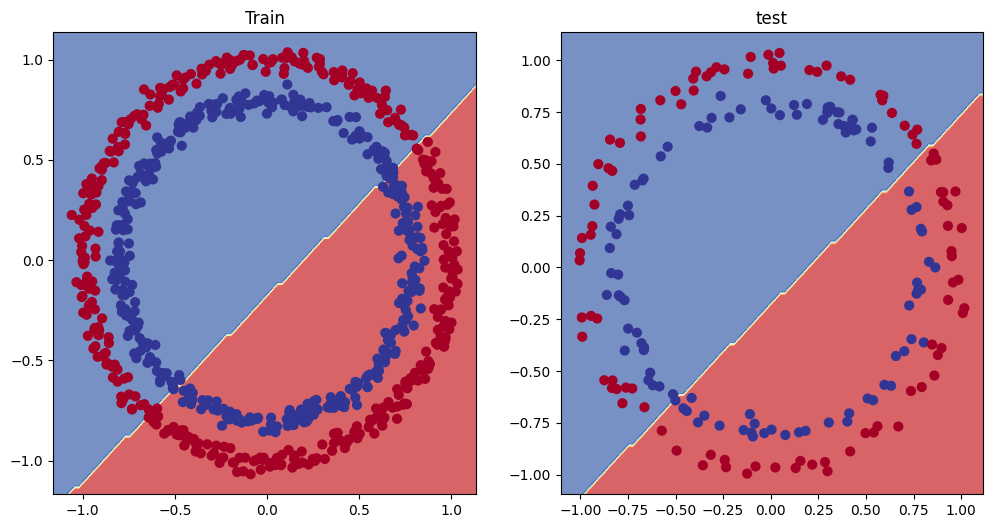

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')

plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_0, X_test, y_test)

In [49]:
#5. Improving a model from a model perspective
# Add more layers
#add modre hidden units 
#fit for longer 
#changing activation functions 
#change the learning rate 
#change the loss function
 

In [50]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5877, -0.2046],
                      [-0.5084, -0.3749],
                      [ 0.4491, -0.5469],
                      [-0.3373,  0.4817],
                      [-0.3861,  0.4798]])),
             ('0.bias', tensor([ 0.5354, -0.5701,  0.6626,  0.3311, -0.1949])),
             ('1.weight',
              tensor([[-0.2960, -0.1652,  0.4019,  0.4166,  0.3271],
                      [-0.2112,  0.4371,  0.4117, -0.1501, -0.2895],
                      [ 0.0887,  0.3448, -0.1272,  0.2484, -0.3200],
                      [-0.3031,  0.1518, -0.2185, -0.1893, -0.2045],
                      [-0.1643, -0.2744, -0.3524,  0.2978, -0.2418],
                      [-0.0991, -0.0352, -0.3649,  0.2447, -0.0900],
                      [-0.2681,  0.1020,  0.0940,  0.0359, -0.1980],
                      [ 0.4076, -0.3075, -0.4695,  0.3579, -0.1144],
                      [ 0.1364,  0.3241, -0.0845, -0.3484, -0.0077],
                      [-0.2235, -0

In [51]:
class CircleModelV1(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
   # z = self.layer_1(x)
  #  z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [53]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    
    model_1.train()
    
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)).to(device)
    
    loss = loss_fn(y_logits,
                  y_train)
    
    acc = accuracy_fn(y_true= y_train,
                     y_pred = y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, 
                           y_test)
        
        test_acc = accuracy_fn(y_true = y_test, 
                              y_pred = test_pred)
        
    if epoch%10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Testloss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Testloss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369, Acc: 50.25% | Testloss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351, Acc: 50.12% | Testloss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339, Acc: 50.50% | Testloss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329, Acc: 50.38% | Testloss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322, Acc: 49.88% | Testloss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317, Acc: 49.38% | Testloss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312, Acc: 49.38% | Testloss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309, Acc: 50.12% | Testloss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307, Acc: 50.50% | Testloss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Testloss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303, Acc: 50.88% | Testloss: 0.69388, Test acc: 46.50%
Epoch: 120 | Loss: 0.69302, Acc: 50.75% | Testloss: 0.69396, Test acc: 46.5

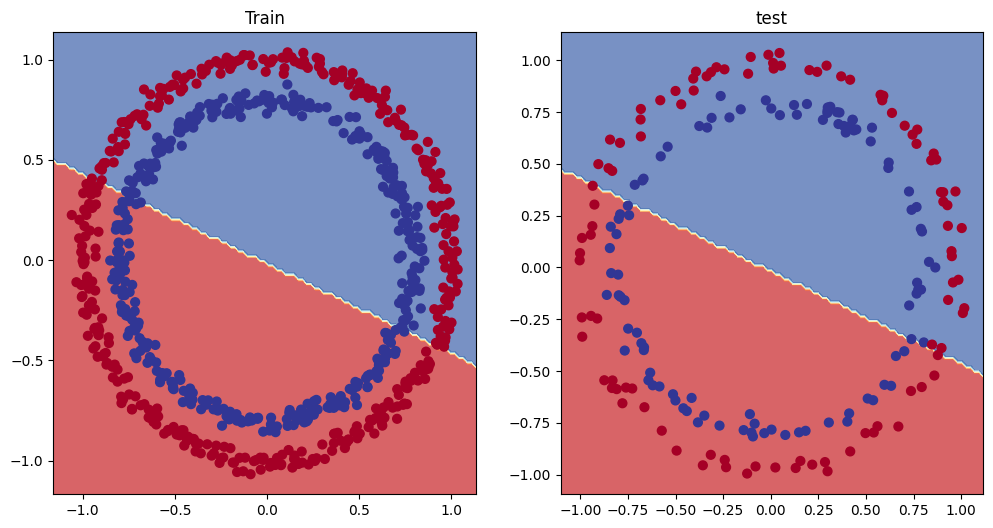

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')

plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(model_1, X_test, y_test)

In [56]:
## 5,1 Preparing data to see if our model can fit a traight line 
#One way to troubleshoot to a larger problem is to test out a smaller problem

In [57]:
weight = 0.7
bias = 0.3
start = 0 
end= 1 
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [58]:
train_split = int(0.8*len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

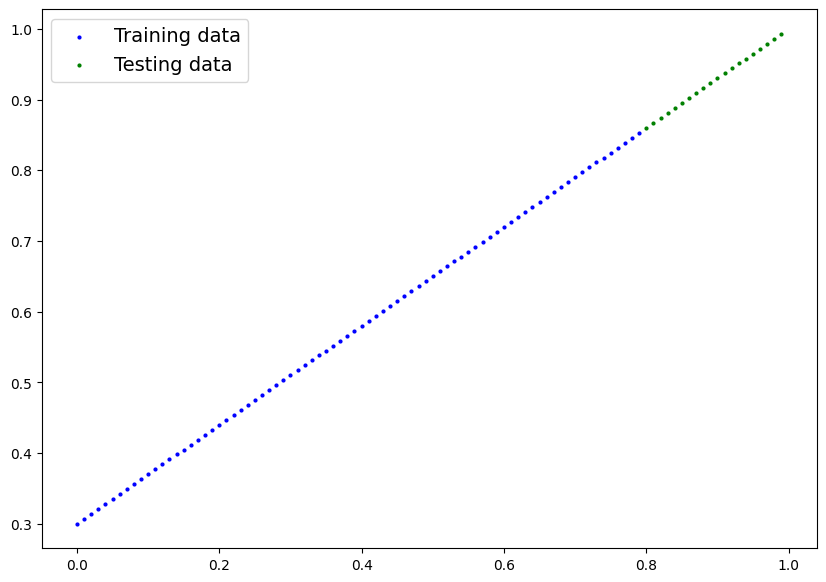

In [59]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [60]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
## 5.2 Adjust model_1 to fir a straight line 

In [62]:
model_2 = nn.Sequential(
    nn.Linear(in_features =1, out_features = 10),
    nn.Linear(in_features=10, out_features = 10),
    nn.Linear(in_features=10, out_features = 1)
).to(device)

In [63]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch %100==0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.75986 | Test loss:  0.91103
Epoch: 100 | Loss:  0.02858 | Test loss:  0.00081
Epoch: 200 | Loss:  0.02533 | Test loss:  0.00209
Epoch: 300 | Loss:  0.02137 | Test loss:  0.00305
Epoch: 400 | Loss:  0.01964 | Test loss:  0.00341
Epoch: 500 | Loss:  0.01940 | Test loss:  0.00387
Epoch: 600 | Loss:  0.01903 | Test loss:  0.00379
Epoch: 700 | Loss:  0.01878 | Test loss:  0.00381
Epoch: 800 | Loss:  0.01840 | Test loss:  0.00329
Epoch: 900 | Loss:  0.01798 | Test loss:  0.00360


TypeError: ignored

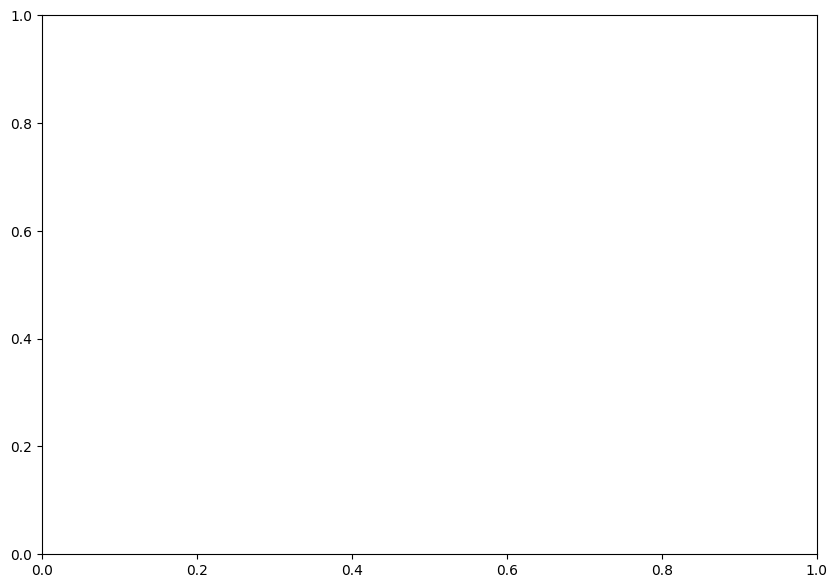

In [65]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression,
                 predictions =y_preds)

In [66]:
#6. THe missing piece: non-linearity 

In [67]:
### 6.1 Recreating non-linear data

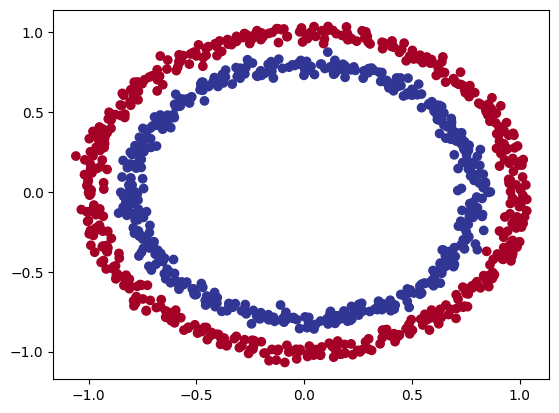

In [84]:
import matplotlib.pyplot as pandas
from sklearn.datasets import make_circles

n_samples = 1000 

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [85]:
# Convert data to tensors and then to train and test splits 

import torch 
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size= 0.2,
                                                     random_state =42)

In [70]:
X_train[:5], y_train[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 tensor([1., 0., 0., 0., 1.]))

In [71]:
#6.2 Building a model with nonlinearity 

In [72]:
# Build a model with nonlinear activation functions 

In [77]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features= 10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [79]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [81]:
#6.4 training a model with non linearity 

In [89]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch %100==0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test_Acc: {test_acc:.2f}%")

Epoch: 0 | Loss:  0.01672, Acc: 99.88% | Test loss:  0.03363, Test_Acc: 100.00%
Epoch: 100 | Loss:  0.01578, Acc: 99.88% | Test loss:  0.03232, Test_Acc: 100.00%
Epoch: 200 | Loss:  0.01494, Acc: 100.00% | Test loss:  0.03117, Test_Acc: 100.00%
Epoch: 300 | Loss:  0.01418, Acc: 100.00% | Test loss:  0.03017, Test_Acc: 99.50%
Epoch: 400 | Loss:  0.01350, Acc: 100.00% | Test loss:  0.02926, Test_Acc: 99.50%
Epoch: 500 | Loss:  0.01288, Acc: 100.00% | Test loss:  0.02841, Test_Acc: 99.50%
Epoch: 600 | Loss:  0.01231, Acc: 100.00% | Test loss:  0.02750, Test_Acc: 99.50%
Epoch: 700 | Loss:  0.01180, Acc: 100.00% | Test loss:  0.02666, Test_Acc: 99.50%
Epoch: 800 | Loss:  0.01132, Acc: 100.00% | Test loss:  0.02589, Test_Acc: 99.50%
Epoch: 900 | Loss:  0.01089, Acc: 100.00% | Test loss:  0.02517, Test_Acc: 99.50%


In [91]:
# 6.4 Evaluating a model trained with non linear activation functions 

model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

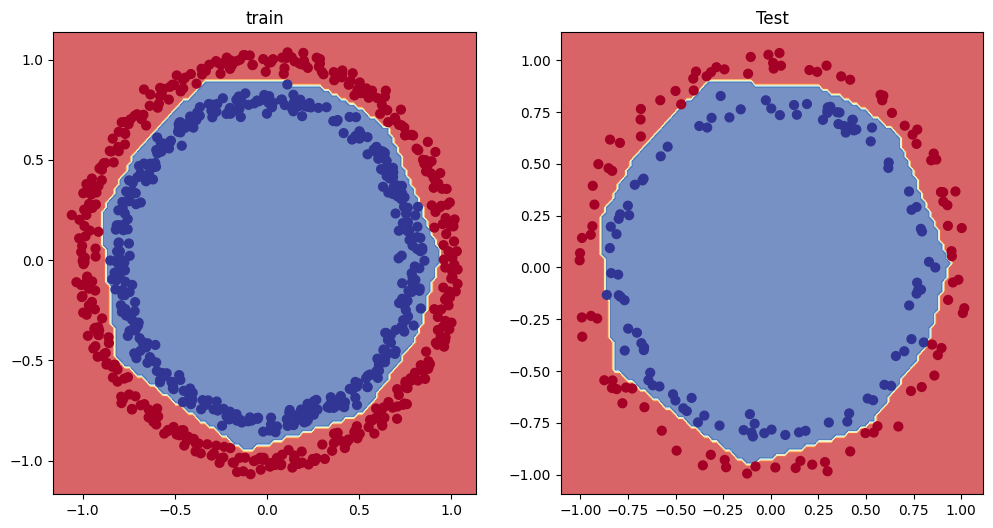

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("train")

plot_decision_boundary(model_3, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test, y_test)